# Лабораторная работа: Частотный конвертер
### Кодуков А.В. 9385

Загрузка

Duration (sec): 2
N1: 22050 , N2: 16000


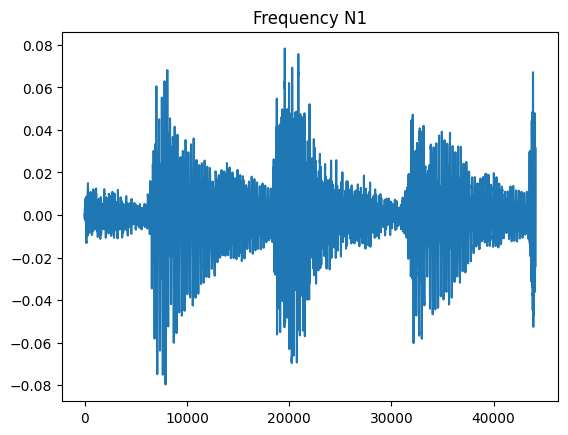

In [12]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

filename = librosa.example('nutcracker', hq=True)

x, sr = librosa.load(filename, mono=True, duration=4)
x = x[sr * 2:] # skip empty signal

dur = len(x) // sr # total seconds in signal
print("Duration (sec):", dur)

N1 = sr
N2 = 16000
n = min(N1, N2)
N = N1 * N2

print("N1:", N1, ", N2:", N2)

# fig, ax = plt.subplots(4, sharex=True, figsize=(12, 6))
plt.plot(x)
plt.title("Frequency N1")
plt.show()

Растягивание

Stretched: 705600000


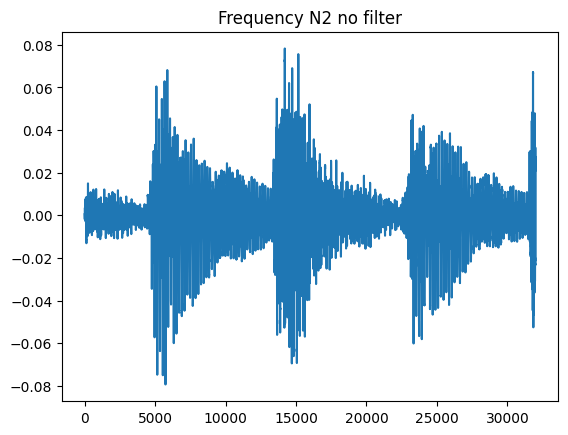

In [17]:
x_stretched = np.ndarray(dur * N, np.float32)
insert_arr = np.ndarray(N2, np.float32)

for j in range(N1 * dur):
    insert_arr.fill(x[j])
    x_stretched[j * N2 : (j + 1) * N2] = insert_arr
print("Stretched:", len(x_stretched))

# прореживание без фильтрации
plt.plot(x_stretched[::N1])
plt.title("Frequency N2 no filter")
plt.show()

Фильтрация и прореживание

Filtered: 705600000
New frequency: 16000.0


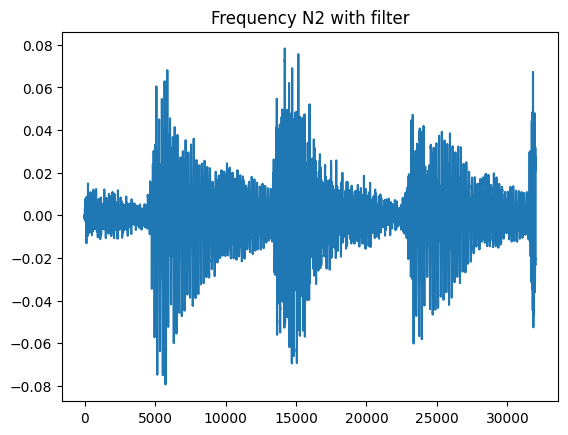

In [18]:
b, a = signal.butter(3, 0.46)
y_stretched = signal.lfilter(b, a, x_stretched, axis=0)
print("Filtered:", len(y_stretched))

y = y_stretched[::N1]
print("New frequency:", len(y) / dur)

plt.plot(y)
plt.title("Frequency N2 with filter")
plt.show()

Сравнение с конвертером librosa

New frequency: 16000.0


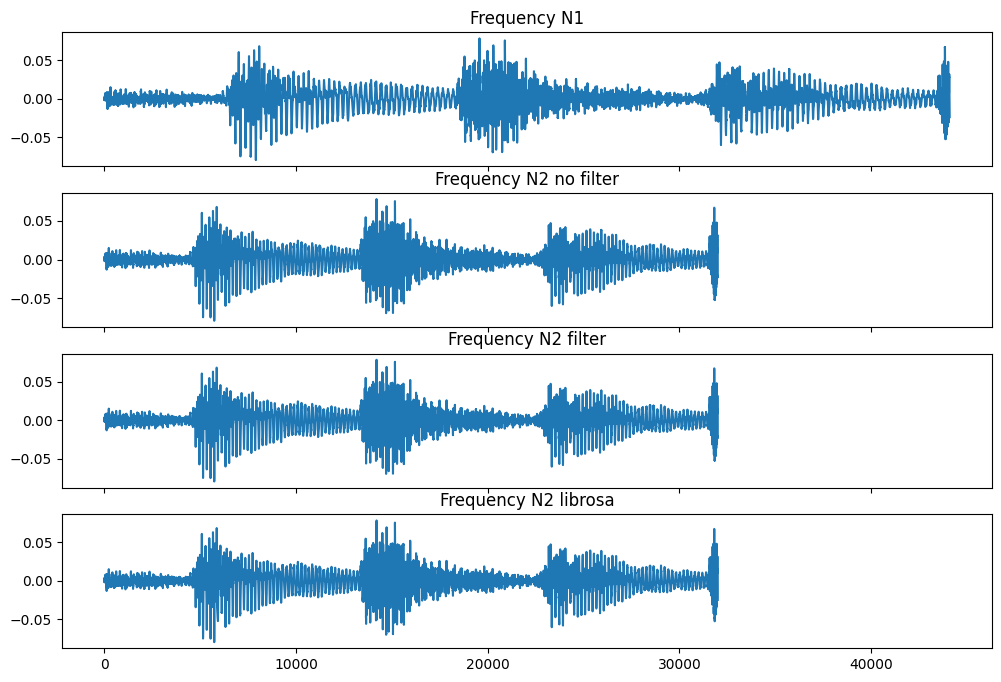

In [20]:
y_rosa, sr2 = librosa.load(filename, mono=True, duration=4, sr=N2)
y_rosa = y_rosa[sr2 * 2:] # skip empty signal

fig, ax = plt.subplots(4, sharex=True, figsize=(12, 8))
ax[0].plot(x)
ax[0].set_title("Frequency N1")
ax[1].plot(x_stretched[::N1])
ax[1].set_title("Frequency N2 no filter")
ax[2].plot(y)
ax[2].set_title("Frequency N2 filter")
ax[3].plot(y_rosa)
ax[3].set_title("Frequency N2 librosa")

print("New frequency:", len(y) / dur)
plt.show()